In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

pd.options.display.max_rows = 10

In [6]:
states = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}

In [7]:
df = pd.read_csv('data/us_house_Sales_data.csv')
df['price'] = pd.to_numeric(df['Price'].astype(str).str.replace('$', '').str.replace(',', ''))
df['state'] = df['State'].map(states)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Price           3000 non-null   object
 1   Address         3000 non-null   object
 2   City            3000 non-null   object
 3   Zipcode         3000 non-null   int64 
 4   State           3000 non-null   object
 5   Bedrooms        3000 non-null   object
 6   Bathrooms       3000 non-null   object
 7   Area (Sqft)     3000 non-null   object
 8   Lot Size        3000 non-null   object
 9   Year Built      3000 non-null   int64 
 10  Days on Market  3000 non-null   int64 
 11  Property Type   3000 non-null   object
 12  MLS ID          3000 non-null   object
 13  Listing Agent   3000 non-null   object
 14  Status          3000 non-null   object
 15  Listing URL     3000 non-null   object
 16  price           3000 non-null   int64 
 17  state           0 non-null      object
dtypes: int64

In [8]:
df.head()

,Price,Address,City,Zipcode,State,Bedrooms,Bathrooms,Area (Sqft),Lot Size,Year Built,Days on Market,Property Type,MLS ID,Listing Agent,Status,Listing URL,price,state
0,"$554,217","5926 Oak Ave, San Diego, CA 65383",San Diego,65383,CA,1 bds,3 ba,772 sqft,4757 sqft,1959,101,Townhouse,Z104635,Alex Johnson - Compass,For Sale,https://www.zillow.com/homedetails/80374762_zpid/,554217,NaN
1,"$164,454","9583 Oak Ave, Fresno, IL 79339",Fresno,79339,IL,1 bds,1 ba,2348 sqft,3615 sqft,1969,46,Apartment,Z535721,Emily Davis - Century 21,Sold,https://www.zillow.com/homedetails/86143665_zpid/,164454,NaN
2,"$1,249,331","8224 Oak Ave, Sacramento, TX 87393",Sacramento,87393,TX,6 bds,1 ba,3630 sqft,9369 sqft,1990,59,Townhouse,Z900458,Mike Lee - Coldwell Banker,For Sale,https://www.zillow.com/homedetails/37082403_zpid/,1249331,NaN
3,"$189,267","232 Oak Ave, Fresno, TX 38666",Fresno,38666,TX,2 bds,1 ba,605 sqft,8804 sqft,1958,119,Apartment,Z318589,John Doe - RE/MAX,Pending,https://www.zillow.com/homedetails/39318132_zpid/,189267,NaN
4,"$465,778","5446 Pine Rd, Los Angeles, CA 23989",Los Angeles,23989,CA,3 bds,2 ba,1711 sqft,9260 sqft,2020,26,Townhouse,Z899716,John Doe - RE/MAX,Pending,https://www.zillow.com/homedetails/22454634_zpid/,465778,NaN


In [9]:
df.sample(5)

,Price,Address,City,Zipcode,State,Bedrooms,Bathrooms,Area (Sqft),Lot Size,Year Built,Days on Market,Property Type,MLS ID,Listing Agent,Status,Listing URL,price,state
611,"$906,038","7041 Oak Ave, Fresno, IL 28975",Fresno,28975,IL,2 bds,4 ba,1516 sqft,4527 sqft,1951,101,Multi-Family,Z697828,John Doe - RE/MAX,Sold,https://www.zillow.com/homedetails/46063956_zpid/,906038,NaN
2198,"$1,056,968","3112 Elm St, San Diego, IL 71107",San Diego,71107,IL,4 bds,2 ba,1973 sqft,3867 sqft,1968,33,Single Family,Z294646,Emily Davis - Century 21,Sold,https://www.zillow.com/homedetails/86905797_zpid/,1056968,NaN
2062,"$1,327,823","829 Elm St, Los Angeles, IL 41731",Los Angeles,41731,IL,4 bds,1 ba,1198 sqft,9580 sqft,1999,95,Single Family,Z665001,Mike Lee - Coldwell Banker,Sold,https://www.zillow.com/homedetails/28952761_zpid/,1327823,NaN
920,"$241,211","6724 Elm St, Sacramento, CA 59994",Sacramento,59994,CA,1 bds,1 ba,1779 sqft,3156 sqft,2019,10,Townhouse,Z893157,Mike Lee - Coldwell Banker,Pending,https://www.zillow.com/homedetails/41380796_zpid/,241211,NaN
1665,"$668,647","3300 Oak Ave, San Francisco, CA 20111",San Francisco,20111,CA,6 bds,3 ba,2843 sqft,6095 sqft,2008,100,Apartment,Z172814,Alex Johnson - Compass,Sold,https://www.zillow.com/homedetails/67523788_zpid/,668647,NaN


In [10]:
pivot = df.pivot_table(index='State', values='price', aggfunc={'price': ['mean', 'median', 'min', 'max']}).reset_index()
pivot

,State,max,mean,median,min
0,CA,1499218,806044.661608,811641.0,100764
1,FL,1496345,834202.892734,859750.0,100283
2,IL,1496721,822910.502504,837702.0,100366
3,NY,1498990,797940.268781,768400.0,100866
4,TX,1499473,793514.649558,796329.0,102028


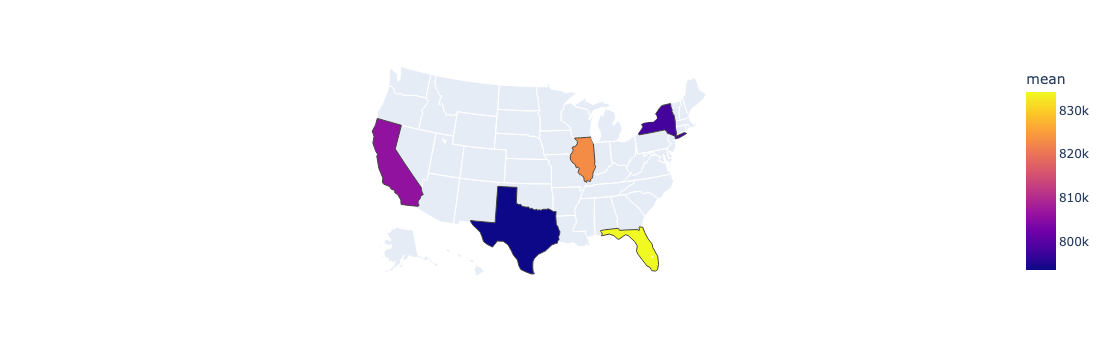

In [13]:
fig = px.choropleth(pivot, locations='State', color='mean', locationmode='USA-states', scope='usa', hover_data=['max', 'mean', 'median', 'min'])
fig.show()